In [25]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.3/548.3 kB 12.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import pymongo
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import scipy
import scipy.stats as stats

client=pymongo.MongoClient("192.168.10.240",27017)
db= client['AI_LKJ']
yeomi_review = db['yeomi_review']
yeomi_review = yeomi_review.find()
yeomi_review = pd.DataFrame(yeomi_review)
kto9suk9suk_review = db['kto9suk9suk_review']
kto9suk9suk_review = kto9suk9suk_review.find()
kto9suk9suk_review = pd.DataFrame(kto9suk9suk_review)

# 데이터 전처리

## 여행에 미치다 페이지에서 국내 여행 게시글만 가져오기

In [2]:
list_region = ['#강원','#경기','#경남','#경북','#광주','#대구','#대전','#부산','#서울','#세종','#울산','#인천','#전남','#전북','#제주','#충남','#충북','#강릉','#고성','#동해','#삼척','#속초','#양구','#양양','#영월','#원주','#인제','#정선','#철원','#춘천','#태백','#평창','#홍천','#화천','#횡성','#가평','#고양','#과천','#광명','#광주','#구리','#군포','#김포','#남양주','#동두천','#부천','#성남','#수원','#시흥','#안산','#안성','#안양','#양주','#양평','#여주','#연천','#오산','#용인','#의왕','#의정부','#이천','#파주','#평택','#포천','#하남','#화성','#거제','#거창','#고성','#김해','#남해','#밀양','#사천','#산청','#양산','#의령','#진주','#창녕','#창원','#통영','#하동','#함안','#함양','#합천','#경산','#경주','#고령','#구미','#김천','#문경','#봉화','#상주','#성주','#안동','#영덕','#영양','#영주','#영천','#예천','#울릉','#울진','#의성','#청도','#청송','#칠곡','#포항','#광산','#남구','#동구','#북구','#서구','#군위','#남구','#달서','#달성','#동구','#북구','#서구','#수성','#중구','#대덕','#동구','#서구','#유성','#중구','#강서','#금정','#기장','#남구','#동구','#동래','#부산진','#북구','#사상','#사하','#서구','#수영','#연제','#영도','#중구','#해운대','#강남','#강동','#강북','#강서','#관악','#광진','#구로','#금천','#노원','#도봉','#동대문','#동작','#마포','#서대문','#서초','#성동','#성북','#송파','#양천','#영등포','#용산','#은평','#종로','#중구','#중랑','#남구','#동구','#북구','#울주','#중구','#강화','#계양','#남동','#동구','#미추홀','#부평','#서구','#연수','#옹진','#중구','#강진','#고흥','#곡성','#광양','#구례','#나주시','#담양','#목포','#무안','#보성','#순천','#신안','#여수','#영광','#영암','#완도','#장성','#장흥','#진도','#함평','#해남','#화순','#고창','#군산','#김제','#남원','#무주','#부안','#순창','#완주','#익산','#임실','#장수','#전주','#정읍','#진안','#서귀포','#제주','#계룡','#공주','#금산','#논산','#당진','#보령','#부여','#서산','#서천','#아산','#예산','#천안','#청양','#태안','#홍성','#괴산','#단양','#보은','#영동','#옥천','#음성','#제천','#증평','#진천','#청주','#충주']
korea_trip = []
for i in yeomi_review[yeomi_review['review_content'].isna()]['card_content']:
    for j in list_region:
        if j in i:
            korea_trip.append(i)
            break
condition_region = f"card_content in {korea_trip}"
korea_yeomi_review = yeomi_review.query(condition_region)
korea_yeomi_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
201,65f9bf4f08bfcc46ca193606,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,NaN,NaN
202,65f9bf4f08bfcc46ca193607,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@shorokhofff,2018년 6월 22일
203,65f9bf4f08bfcc46ca193608,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@soye0114 여기 다니엘 뮤비 찍은곳인가???!!!,2018년 2월 24일
204,65f9bf5008bfcc46ca193609,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@h.a.ing 요기봐 ㅋㅋㅋㅋㅋㅋ,2018년 2월 8일
205,65f9bf5008bfcc46ca19360a,".\n#인제, #Inje, #대한민국, #Korea\n.\n.\n자작나무 숲 분위기...",2018년 1월 22일,7447,,BePBx_qBqwm,@dal.hye 야 나 여기 가고싶어ㅠㅠㅠ,2018년 1월 28일
...,...,...,...,...,...,...,...,...
1152424,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
1152425,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
1152426,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
1152427,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 구석구석 페이지와 여행에 미치다 페이지에서 가져온 데이터 합치기

In [3]:
kto9suk9suk_review

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
125933,662a1fb44a4fe5fadf3f71ee,신규 개장 기념 무료 운영 중(~5/6)‼ 짜릿함 최고인😆 김천 #사계절썰매장\n\...,2024년 4월 25일,106,,C6LYPKTSzun,🛷,2024년 4월 25일
125934,662f1d43b33c9dc30aa95f3f,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN
125935,662f1d4bb33c9dc30aa95f40,범선의 휘황찬란한 실루엣이 영덕 대게를 먹으러 찾는 방문객을 반기는 이곳 +_+ 대...,2014년 8월 26일,100,,sJhwZxzTCf,NaN,NaN
125936,662f22cb5cb025207273f6f6,"제주도 토종 소, 흑한우 살짝 레어로 익혀 한 입에 쏘옥~!\n참 숯불로 구워 더욱...",2014년 8월 5일,81,,rT9rIsTTNs,NaN,NaN


In [4]:
df_sns = pd.concat([kto9suk9suk_review, korea_yeomi_review], ignore_index=True)
df_sns

,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date
0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN
1,65f99f8608bfcc46ca19351e,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,정말 아름다워요,2014년 7월 9일
2,65f99f8608bfcc46ca19351f,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,멋진 섬이네요,2014년 6월 24일
3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN
4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN
...,...,...,...,...,...,...,...,...
599153,662b80e0f231019cd5b61943,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,NaN,NaN
599154,662b80e0f231019cd5b61944,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,미츠바 좋습니당,2024년 4월 26일
599155,662b80e0f231019cd5b61945,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,와 이제 곧 장미공원의 시즌이다,2024년 4월 26일
599156,662b80e1f231019cd5b61946,"일단 저장!📩 서울에서 데이트, 야장, 피크닉까지 쌈@뽕하게 즐기는 방법😜\n\n서...",2024년 4월 26일,123,,C6OA2Fbhy5r,혹시 여기 다 가본 사람 있어? 어디가 젤 좋았는지 추천해주라줘~🙋🏻‍♀️,2024년 4월 26일


## 어느 지역에 관한 표시

In [5]:
region_gw = ['강원도 ','강원 ','강원특별자치도 ','#강원','#강릉', '#고성', '#동해', '#삼척', '#속초', '#양구', '#양양', '#영월', '#원주', '#인제', '#정선', '#철원', '#춘천', '#태백', '#평창', '#홍천', '#화천', '#횡성']
region_gg = ['경기도 ','경기 ','#경기','#가평', '#고양', '#과천', '#광명', '#구리', '#군포', '#김포', '#남양주', '#동두천', '#부천', '#성남', '#수원', '#시흥', '#안산', '#안성', '#안양', '#양주', '#양평', '#여주', '#연천', '#오산', '#용인', '#의왕', '#의정부', '#이천', '#파주', '#평택', '#포천', '#하남', '#화성']
region_gn = ['경상남도 ','경남 ','#경남 ','#거제', '#거창', '#고성', '#김해', '#남해', '#밀양', '#사천', '#산청', '#양산', '#의령', '#진주', '#창녕', '#창원', '통영', '#하동', '#함안', '#함양', '#합천']
region_gb = ['경상북도 ','경북 ','#경북','#경산', '#경주', '#고령', '#구미', '#김천', '#문경', '#봉화', '#상주', '#성주', '#안동', '#영덕', '#영양', '#영주', '#영천', '#예천', '#울릉', '#울진', '#의성', '#청도', '#청송', '#칠곡', '#포항']
region_gj = ['광주광역시 ','광주 ','#광주','#광산']
region_dg = ['대구광역시 ','대구 ','#대구','#군위', '#달서', '#달성', '#수성']
region_dj = ['대전광역시 ','대전 ','#대전','#대덕',   '#유성']
region_sj = ['세종특별자치시 ','세종 ','#세종']
region_bs = ['부산특별시 ','부산 ','#부산', '#금정', '#기장',  '#동래', '#부산진', '#사상', '#사하',  '#수영', '#연제', '#영도',  '#해운대']
region_su = ['서울특별시 ','서울 ','#서울','#강남', '#강동', '#강북', '#관악', '#광진', '#구로', '#금천', '#노원', '#도봉', '#동대문', '#동작', '#마포', '#서대문', '#서초', '#성동', '#성북', '#송파', '#양천', '#영등포', '#용산', '#은평', '#종로',  '#중랑']
region_us = ['울산광역시 ', '울산 ','#울산', '#울주']
region_ic = ['인천광역시 ','인천 ','#인천','#강화', '#계양', '#남동',  '#미추홀', '#부평',  '#연수', '#옹진']
region_jn = ['전라남도 ','전남 ','#강진', '#전남','#고흥', '#곡성', '#광양', '#구례', '#나주', '#담양', '#목포', '#무안', '#보성', '#순천', '#신안', '#여수', '#영광', '#영암', '#완도', '#장성', '#장흥', '#진도', '#함평', '#해남', '#화순']
region_jb = ['전라북도 ','전북 ','#고창', '#전북','#군산', '#김제', '#남원', '#무주', '#부안', '#순창', '#완주', '#익산', '#임실', '#장수', '#전주', '#정읍', '#진안']
region_jj = ['제주특별자치도 ','제주 ','#서귀포', '#제주']
region_cn = ['충청남도 ','충남 ','#충남','#계룡', '#공주', '#금산', '#논산', '#당진', '#보령', '#부여', '#서산', '#서천', '#아산', '#예산', '#천안', '#청양', '#태안', '#홍성']
region_cb = ['충청북도 ','충북 ','#충북','#괴산', '#단양', '#보은', '#영동', '#옥천', '#음성', '#제천', '#증평', '#진천', '#청주', '#충주']

In [6]:
from collections import Counter

for i in range(len(df_sns)):
    region_tour=[]
    city_tour = []
    for j in region_gw:
        if j in df_sns['card_content'][i]:
            region_tour.append('강원')
            city_tour.append(j)
    for j in region_gg:
        if j in df_sns['card_content'][i]:
            region_tour.append('경기')
            city_tour.append(j)
    for j in region_gn:
        if j in df_sns['card_content'][i]:
            region_tour.append('경남')
            city_tour.append(j)
    for j in region_gj:
        if j in df_sns['card_content'][i]:
            region_tour.append('광주')   
            city_tour.append(j)
    for j in region_gb:
        if j in df_sns['card_content'][i]:
            region_tour.append('경북')   
            city_tour.append(j)
    for j in region_sj:
        if j in df_sns['card_content'][i]:
            region_tour.append('세종')   
            city_tour.append(j)
    for j in region_dg:
        if j in df_sns['card_content'][i]:
            region_tour.append('대구')
            city_tour.append(j)
    for j in region_dj:
        if j in df_sns['card_content'][i]:
            region_tour.append('대전')
            city_tour.append(j)
    for j in region_bs:
        if j in df_sns['card_content'][i]:
            region_tour.append('부산')
            city_tour.append(j)
    for j in region_su:
        if j in df_sns['card_content'][i]:
            region_tour.append('서울')
            city_tour.append(j)
    for j in region_us:
        if j in df_sns['card_content'][i]:
            region_tour.append('울산')
            city_tour.append(j)
    for j in region_ic:
        if j in df_sns['card_content'][i]:
            region_tour.append('인천')
            city_tour.append(j)
    for j in region_jn:
        if j in df_sns['card_content'][i]:
            region_tour.append('전남')    
            city_tour.append(j)
    for j in region_jb:
        if j in df_sns['card_content'][i]:
            region_tour.append('전북')
            city_tour.append(j)
    for j in region_jj:
        if j in df_sns['card_content'][i]:
            region_tour.append('제주')
            city_tour.append(j)
    for j in region_cn:
        if j in df_sns['card_content'][i]:
            region_tour.append('충남')
            city_tour.append(j)
    for j in region_cb:
        if j in df_sns['card_content'][i]:
            region_tour.append('충북')
            city_tour.append(j)
    word_region = Counter(region_tour)
    most_common_region = word_region.most_common(1)
    most_common_region_keys = [word for word, count in most_common_region]
    word_city = Counter(city_tour)
    most_common_city = word_city.most_common(1)
    most_common_city_keys = [word for word, count in most_common_city]
    df_sns.loc[i, 'region'] = ", ".join(most_common_region_keys)
    df_sns.loc[i, 'city'] = ", ".join(city_tour)


## 댓글에 관한 데이터와 제목에 관한 데이터 분류

In [7]:
df_sns_review = df_sns[df_sns['review_content'].notna()]
df_sns_title = df_sns[df_sns['review_content'].isna()]
df_sns_review = df_sns_review.reset_index()
df_sns_review
df_sns_title = df_sns_title.reset_index()
df_sns_title


,index,_id,card_content,card_date,card_like,card_watch,check_point,review_content,review_date,region,city
0,0,65f99f8608bfcc46ca19351d,알려지지 않았다고 해서 가치가 없는 것은 아니다. 한 장의 사진으로 사랑 받게 된 ...,2014년 6월 23일,50,,pkcKuIzTJ0,NaN,NaN,,
1,3,65f99f8808bfcc46ca193520,"멋진 풍경과 감동, 여행과 휴식은 생각보다 가까운 곳에 있다. 부산 만덕 레고마을\...",2014년 6월 23일,87,,pk8YhwTTDR,NaN,NaN,부산,부산
2,4,65f99f8b08bfcc46ca193521,"유유자적 한가로이 풀을 뜯는 말 뒤편,\n걸려있는 구름마저도 평화로운 성산일출봉\n...",2014년 7월 10일,42,,qQx_BQTTBH,NaN,NaN,제주,#제주
3,7,65f99f8d08bfcc46ca193524,울산 명선도의 불게 타오르는 노을과 해무의 장관\n마치 그림을 그려놓은듯한 풍경에 ...,2014년 7월 11일,58,,qTGZrrzTAH,NaN,NaN,울산,"울산 , #울산"
4,11,65f99f8f08bfcc46ca193528,비가 내린 후에야 진정한 모습을 드러내는 시무지기폭포\n이 비경을 만나러 가는 고된...,2014년 7월 12일,39,,qVtXCrTTIY,NaN,NaN,광주,"광주 , #광주"
...,...,...,...,...,...,...,...,...,...,...,...
5187,599013,662abcaaf231019cd5b60515,"드디어 다음주, 국가권력급 벚꽃맛집 ‘여의도’ 봄꽃축제 개막 (뿌뿌-)\n\n누가 ...",2024년 3월 23일,3091,,C41qMeoBkpF,NaN,NaN,서울,"서울 , #서울"
5188,599038,662abe16f231019cd5b60b80,지금 제일 핫하다는 기안84 전시 ‘기안도(奇案島)’ 후기 🔥\n다들 여기서 기안8...,2024년 3월 26일,4752,,C49-AnfBEhj,NaN,NaN,서울,"서울 , #서울"
5189,599137,662ada15f231019cd5b61622,"지친 일상으로부터 벗어날 수 있는 시간, 응봉산에서 🌙\n\n이번 한주도 수고한 여...",2024년 4월 19일,1530,,C58BRwIhdW4,NaN,NaN,서울,"서울 , #서울"
5190,599140,662af284f231019cd5b61861,거창 여행 어떻게 할지 모르겠다고? 😎 여미가 직접 다녀와서 알려주는 [밥상의 여정...,2024년 4월 24일,1288,,C6I3IZBhfzp,NaN,NaN,경남,#거창


In [8]:
pivot_review = pd.pivot_table(df_sns_review,index=['region','card_content','card_date','card_like','card_watch'],values='_id',aggfunc='count')
df_sns_title = pivot_review.reset_index()

In [9]:
len(df_sns_title)

4652

In [12]:
df_sns_title.loc[:,'card_content'] = df_sns_title['card_content'].apply(split)

In [ ]:
def split(text):
    new_text = text.replace("#", " ")
    return " ".join(new_text.split())

## 계절별로 분류

In [13]:
for i in range(len(df_sns_title)):
    df_sns_title.loc[i,'card_month'] = df_sns_title.loc[i,'card_date'].split()[1][:-1]
    if df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['3','4','5']:
        df_sns_title.loc[i,'card_season'] = '봄'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['6','7','8']:
        df_sns_title.loc[i,'card_season']  = '여름'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['9','10','11']:
        df_sns_title.loc[i,'card_season']  = '가을'
    elif df_sns_title.loc[i,'card_date'].split()[1][:-1] in ['12','1','2']:
        df_sns_title.loc[i,'card_season'] = '겨울'


In [14]:
df_sns_title['card_season'].value_counts()

card_season
여름    1280
가을    1178
봄     1130
겨울    1064
Name: count, dtype: int64

In [15]:
df_sns_title['card_month'].value_counts()

card_month
8     487
7     413
10    397
11    396
3     395
9     385
6     380
1     375
12    373
5     373
4     362
2     316
Name: count, dtype: int64

## 키워드 분류

In [532]:
# 토크나이징 함수 정의
flower_list = ['단풍나무','은행나무','낙엽','꽃무릇','수레국화','참꽃','단풍','들꽃','마지기','꽃잔디','봄꽃','해바라기','수선화','목련','벚꽃','장미','라벤더','무궁화','황화','코스모스','국화','댑싸리','맨드라미','유채꽃','튤립','진달래','수국','배롱나무','매화','철쭉','산수유','유채','은행','팜파스','데이지','개나리','맥문동']
stopwords =['합격자','발표','상환','금융','재단','계약','새해','연말','하락','수상작','말티재','신용카드','원리금','엽서','헬기','스마트','겨울왕국','소통','하늘정원','난산','보롬왓','청산도','가파도','사승봉도','백제','관광','디지털','평점','거래','카드','평화','백호','수칙','확산','대국민','금요일','가사','마음','심쿵','제발','혼인','발생','시점','내용','내외','상황','사전','미션','신용','대출','두기','거리','지역','발대식','취재','기사','사회','연체','약정', '금리','할부','단계','농협카드','일부','자단','격상','로컬힙','여행지','추천','풍경','마을','국내','여행','스타','그램','구석구석','가을','겨울','여름','봄','사진','위치','모두','일상','방역','준수','트래블','리더','시작','제공']
list_region = ['양양군','하동군','창녕군','보성군','해남군','강원','경기','경남','경북','광주','대구','대전','부산','서울','세종','울산','인천','전남','전북','제주','충남','충북','강릉','고성','동해','삼척','속초','양구','양양','영월','원주','인제','정선','철원','춘천','태백','평창','홍천','화천','횡성','가평','고양','과천','광명','광주','구리','군포','김포','남양주','동두천','부천','성남','수원','시흥','안산','안성','안양','양주','양평','여주','연천','오산','용인','의왕','의정부','이천','파주','평택','포천','하남','화성','거제','거창','고성','김해','남해','밀양','사천','산청','양산','의령','진주','창녕','창원','통영','하동','함안','함양','합천','경산','경주','고령','구미','김천','문경','봉화','상주','성주','안동','영덕','영양','영주','영천','예천','울릉','울진','의성','청도','청송','칠곡','포항','광산','남구','동구','북구','서구','군위','남구','달서','달성','동구','북구','서구','수성','중구','대덕','동구','서구','유성','중구','강서','금정','기장','남구','동구','동래','부산진','북구','사상','사하','서구','수영','연제','영도','중구','해운대','강남','강동','강북','강서','관악','광진','구로','금천','노원','도봉','동대문','동작','마포','서대문','서초','성동','성북','송파','양천','영등포','용산','은평','종로','중구','중랑','남구','동구','북구','울주','중구','강화','계양','남동','동구','미추홀','부평','서구','연수','옹진','중구','강진','고흥','곡성','광양','구례','나주시','담양','목포','무안','보성','순천','신안','여수','영광','영암','완도','장성','장흥','진도','함평','해남','화순','고창','군산','김제','남원','무주','부안','순창','완주','익산','임실','장수','전주','정읍','진안','서귀포','제주','계룡','공주','금산','논산','당진','보령','부여','서산','서천','아산','예산','천안','청양','태안','홍성','괴산','단양','보은','영동','옥천','음성','제천','증평','진천','청주','충주']
stopwords.extend(list_region) 
from konlpy.tag import Okt
okt = Okt()
from mecab import MeCab
mecab = MeCab()
def Tokenizer(raw, pos=["Noun"], stopword=stopwords):
    word_list = []
    for word, tag in okt.pos(raw,norm=True,stem=True):
        if len(word) > 1 and tag in pos and word not in stopword:
            if mecab.pos(word)[0][1] in ["NNG"]:
                if word in flower_list:
                    word = "꽃"
                word_list.append(word)
    return " ".join(word_list)

In [533]:
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content'].apply(Tokenizer)

In [543]:
def replace(text):
    text = text.replace("팔도 장터", "팔도장터")
    text = text.replace("취미 프로젝트", "취미프로젝트")
    return text
df_sns_title.loc[:,'card_content_clean']=df_sns_title['card_content_clean'].apply(replace)

In [552]:
def flower(text):
    if "꽃" in text:    
        return 1
df_sns_title.loc[:,'flower_check']=df_sns_title['card_content_clean'].apply(flower)

In [569]:
def festival(text):
    if "축제" in text:    
        return 1
df_sns_title.loc[:,'festival_check']=df_sns_title['card_content_clean'].apply(festival)

## 계절별로 키워드 분류

In [554]:
df_sns_title_spring = df_sns_title.query("card_season=='봄'")
df_sns_title_summer = df_sns_title.query("card_season=='여름'")
df_sns_title_fall = df_sns_title.query("card_season=='가을'")
df_sns_title_winter = df_sns_title.query("card_season=='겨울'")
spring_text = " ".join(list(df_sns_title_spring.loc[:,'card_content_clean']))
summer_text = " ".join(list(df_sns_title_summer.loc[:,'card_content_clean']))
fall_text = " ".join(list(df_sns_title_fall.loc[:,'card_content_clean']))
winter_text = " ".join(list(df_sns_title_winter.loc[:,'card_content_clean']))

In [555]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([spring_text,summer_text,fall_text,winter_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
season = ['봄','여름','가을','겨울']
season_list = []
for i, sentence in enumerate([spring_text, summer_text, fall_text, winter_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    season_list.append(word_dict)
    row = {'Sentence': season[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

,Sentence,Top Words
0,봄,"[스냅 드라이브, 가족 스냅, 봄바람, 전복, 가족 드라이브, 주간, 악어, 해발 난이도, 엔딩, 미륵사, 동쪽 촬영, 개최 기간, 팝콘, 연등, 연등축제, 꽃동산, 소풍, 만년, 가시리, 청풍호, 순천만 국제, 야생, 세계 박람회, 등나무, 치즈 랜드, 재첩, 장대, 미산, 무지개분수, 레일, 군인, 창덕궁 달빛, 장미꽃, 달빛 기행, 다음주, 기준 왕복, 하트, 주가, 잔디밭, 작년 촬영, 산청군, 낙화, 혼밥, 축제 주말, 촬영 유료, 촬영 무료, 어린이날, 신흥, 수도권 속초시, 속초시 수도권, 생초 국제, 생초, 벚나무, 하절 절기, 통창, 캡슐, 찻길, 이용 촬영, 우동, 수상, 서핑, 비봉, 보라색, 보라, 극장, 주차장 운영, 유료 주차장, 세계 축제, 목향, 도해 공원, 도해, 경회루, 출구 기준, 춘향제, 지금 잠시, 증평군, 점터 찻집, 점터, 잠시 동참, 우유 커피, 오륙도 공원, 오늘 날씨, 연탄 불고기, 가포, 희생, 화개면, 함안군, 선선, 박수, 모임, 라디오, 초록빛 자연, 주소 운영, 정원 박람회, 재첩 국수, 연탄, 사건, 보문정, 민속촌, 미산 동산]"
1,여름,"[휴가, 물놀이, 서핑, 장마, 반딧불, 하늘색, 더위, 밥상 여정, 워터파크, 보라색, 무더위, 루지, 주인, 선선, 하늬, 레저, 낙화, 여름밤, 수박, 차밭, 광복절, 수심, 데이트 휴가, 패션, 인분, 수상, 복숭아, 아워플래닛, 베드, 물줄기, 명사, 펭수, 장마전선, 남산 타워, 빙수, 비봉, 활옥, 인구, 옥천군, 예천군, 스퀘어, 도깨비 야시장, 능소화, 창밖, 비진도, 휴가 패션, 파랑색, 카바, 장마전선 영향, 인스타그램 오픈, 윈드서핑, 오픈 이벤트, 영양군, 목시, 활옥 동굴, 백일홍, 금계, 하트, 투숙, 코끼리, 청양군, 주간, 왼쪽, 아웃도어, 세포, 비양도, 비빔, 비교, 보라, 문학, 청운 문학, 재인, 생선 구이, 문학 도서관, 매일 운영, 검사, 해물 라면, 평상, 편의점, 청운, 주막, 일러스트, 벌레, 바람개비, 레일, 랜선뷰, 기기, 과일, 휴가 인생, 폴리, 코끼리 마늘, 치맥, 조개찜, 원앙 폭포, 원앙, 영상 공모전, 에어컨, 씨낵, 반딧불 축제, 무지개 도로]"
2,가을,"[취미, 취미프로젝트, 팔도장터, 선선, 유등, 다이빙, 바나나, 반계, 승마, 세계 불꽃, 베리, 서핑, 운석, 대회, 주산지, 환기 미술관, 화보 형태, 형태 캠페인, 헤어 메이크업, 한가위, 프로젝트 사람, 풍산개, 취미프로젝트 취미, 충돌구, 의상 기획, 운석 충돌구, 메이크업 모델, 메이크업, 매력 고유, 관람 소요, 고유 화보, 천일홍, 오디, 백일홍, 고석정 꽃밭, 개항, 호로, 판악, 사연, 부용, 명상, 담양군, 관음사, 할로윈, 이동 자제, 쌀국수, 무진장, 기획 디자인, 강유 축제, 커뮤니티, 참가 신청, 외계인, 배경화면, 로컬 매력, 두루 누비, 두루, 댓글 작성, 대금, 비양도, 당첨 상품, 나주, 한글, 케이스, 재인 폭포, 재인, 인승, 예천군, 사람 로컬, 먹방 투어, 강유, 간월재, 호로 고루, 외도, 보라, 노포, 금빛, 구절초, 특별 기간, 추석 특별, 의성군, 유등 축제, 운현궁, 옥리, 심돈, 상품 최대, 사진작가 헤어, 디자인 사진작가, 독락당, 나루터, 금강송, 세계 문화유산, 상생, 보석, 백양사, 만족도, 랜덤, 꽃들이, 군인, 코스 판악, 체육 공원]"
3,겨울,"[눈썰매장, 눈썰매, 스팟 포토, 송어, 산타, 설산, 가족 스냅, 관음사, 스냅 드라이브, 설날, 판악, 얼음 분수, 수행, 세리, 투어 참여, 지원 불가, 스케이트, 소원, 상고대, 지원 방법, 예정자, 아이젠, 수여, 고군산군도, 참여 기회, 일정 모집, 수행 지급, 관음사 코스, 모집 기간, 케이 센터, 지원 제출, 얼음 축제, 얼음 썰매, 불참, 추위, 선발, 대피소, 활동 혜택, 세리 성당, 모집 대상, 회의, 활동 시상, 활동 변경, 콘텐츠 게시, 우수 활동, 알파카, 소망, 불참 최종, 기획 회의, 광부, 탄소, 산양, 활동 기간, 일몰 출입, 온라인 지원, 암산, 방법 온라인, 모집 일정, 모집 공고, 면접, 대학생 모집, 대외 활동, 대외, 판악 코스, 졸업, 점등 시간, 우수, 안전 일몰, 공사 대학생, 트럴 파크, 트럴, 체육관 광부, 송어 축제, 분수 축제, 문화 체육관, 명함, 지급, 업무, 모집 인원, 마당 도서관, 체육관, 장갑, 야경 출사, 스키장, 현대 미술관, 별빛 정원, 공고, 감귤, 활동 안전, 혜택 공사, 축제 얼음, 채널 제작, 진행 방식, 지침 활동, 제작 콘텐츠, 제외 일정, 정부 지침, 자판기, 원서, 예정 정부]"


## 지역별로 키워드 분류

In [582]:
df_sns_title['region'].value_counts()

region
서울    602
제주    579
강원    558
경남    410
경북    382
경기    361
      360
전남    274
부산    261
충남    231
전북    193
충북    112
인천    101
대구     90
울산     61
대전     39
광주     29
세종      9
Name: count, dtype: int64

In [583]:
df_sns_title_gg = df_sns_title.query("region=='경기'")
df_sns_title_gw = df_sns_title.query("region=='강원'")
df_sns_title_gb = df_sns_title.query("region=='경북'")
df_sns_title_gn = df_sns_title.query("region=='경남'")
df_sns_title_cn = df_sns_title.query("region=='충남'")
df_sns_title_cb = df_sns_title.query("region=='충북'")
df_sns_title_bs = df_sns_title.query("region=='부산'")
df_sns_title_ic = df_sns_title.query("region=='인천'")
df_sns_title_su = df_sns_title.query("region=='서울'")
df_sns_title_dj = df_sns_title.query("region=='대전'")
df_sns_title_dg = df_sns_title.query("region=='대구'")
df_sns_title_gj = df_sns_title.query("region=='광주'")
df_sns_title_sj = df_sns_title.query("region=='세종'")
df_sns_title_jn = df_sns_title.query("region=='전남'")
df_sns_title_jb = df_sns_title.query("region=='전북'")
df_sns_title_jj = df_sns_title.query("region=='제주'")
df_sns_title_us = df_sns_title.query("region=='울산'")

gg_text = " ".join(list(df_sns_title_gg.loc[:,'card_content_clean']))
gw_text = " ".join(list(df_sns_title_gw.loc[:,'card_content_clean']))
gb_text = " ".join(list(df_sns_title_gb.loc[:,'card_content_clean']))
gn_text = " ".join(list(df_sns_title_gn.loc[:,'card_content_clean']))
cn_text = " ".join(list(df_sns_title_cn.loc[:,'card_content_clean']))
cb_text = " ".join(list(df_sns_title_cb.loc[:,'card_content_clean']))
bs_text = " ".join(list(df_sns_title_bs.loc[:,'card_content_clean']))
ic_text = " ".join(list(df_sns_title_ic.loc[:,'card_content_clean']))
su_text = " ".join(list(df_sns_title_su.loc[:,'card_content_clean']))
dj_text = " ".join(list(df_sns_title_dj.loc[:,'card_content_clean']))
dg_text = " ".join(list(df_sns_title_dg.loc[:,'card_content_clean']))
gj_text = " ".join(list(df_sns_title_gj.loc[:,'card_content_clean']))
sj_text = " ".join(list(df_sns_title_sj.loc[:,'card_content_clean']))
jn_text = " ".join(list(df_sns_title_jn.loc[:,'card_content_clean']))
jb_text = " ".join(list(df_sns_title_jb.loc[:,'card_content_clean']))
jj_text = " ".join(list(df_sns_title_jj.loc[:,'card_content_clean']))
us_text = " ".join(list(df_sns_title_us.loc[:,'card_content_clean']))


In [585]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfVectorizer = TfidfVectorizer(use_idf=True,max_df=0.8,min_df=0.02,ngram_range=(1,2))
features = tfidfVectorizer.fit([spring_text,summer_text,fall_text,winter_text])
tfidf_matrix = tfidfVectorizer.transform([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text])
feature_names = tfidfVectorizer.get_feature_names_out()
data = []
region = ['경기','강원','경북','경남','충남','충북','부산','인천','서울','대전','대구','광주','세종','전남','전북','제주','울산']
region_list = []
for i, sentence in enumerate([gg_text, gw_text, gb_text, gn_text,cn_text,cb_text,bs_text,ic_text,su_text,dj_text,dg_text,gj_text,sj_text,jn_text,jb_text,jj_text,us_text]):
    top_words = sorted(zip(tfidf_matrix[i].toarray()[0], feature_names), reverse=True)
    word_list = []
    for word in top_words:
        if len(word[1].split()) == len(set(word[1].split())):
            word_list.append(word)
    word_list = word_list[:100]
    word_dict = {}
    for j in range(len(word_list)):
        word_dict[word_list[j][1]] = word_list[j][0]
    region_list.append(word_dict)
    row = {'Sentence': region[i], 'Top Words': [word[1] for word in word_list]}
    data.append(row)

df = pd.DataFrame(data)
df

,Sentence,Top Words
0,경기,"[재인, 호로, 재인 폭포, 민속촌, 호로 고루, 연천군, 서핑, 연무대, 풍산개, 별빛 정원, 미산, 오리 썰매, 갯골, 갯골 생태, 아침 고요, 고요 수목원, 심돈, 장안문, 대회, 미산 동산, 동북 심돈, 휴가, 단원구, 통술, 우음도, 오색 별빛, 수박, 물의 정원, 동북, 지질 공원, 주간, 물놀이, 곤돌라, 장마전선 영향, 장마전선, 여주시, 얼음 썰매, 서핑 대회, 부대찌개, 미산 축제, 랜드 핑크, 랜드 대신, 토스카나, 천일홍, 스냅 드라이브, 비둘기, 나리 공원, 광교, 가족 스냅, 호수 다리, 군인, 황포돛배, 연무대 주차장, 불빛 동화, 민간인, 미사리, 미꾸라지, 명성산, 눈썰매장, 눈썰매, 국제 서핑, 통술 박물관, 용연, 썰매 축제, 신륵사, 수종사, 수문, 송어, 베리, 동화 축제, 고구려, 호수 공원, 하늘 다리, 프리미엄 아울렛, 채소, 정원 우주, 바람개비, 행궁, 피맥, 패션, 파머스, 축제 운영, 청소년 군인, 주중 주말, 순환, 세계 문화유산, 선선, 본관, 벽초, 배줌, 군인 어린이, 구독, 화석, 호밀, 피맥 컴퍼니, 트렁크, 치킨 골목, 참가 신청, 임진각로, 월화]"
1,강원,"[서핑, 취미, 취미프로젝트, 휴가, 하늬, 송어, 눈썰매장, 민둥산, 영월군, 반계, 승마, 인구, 산양, 다이빙, 고석정 꽃밭, 취미프로젝트 취미, 알파카, 스퀘어 루트, 스퀘어, 동강, 서킷, 생선 구이, 비골, 미인 폭포, 생선, 경포, 조대, 안목, 스키장, 명사, 메밀국수, 델피, 강문, 인제군, 알파 코스터, 알파, 상고대, 맹방, 씨낵, 망상 해수욕장, 대관령 눈꽃, 해피 초원, 특별자치도 정선군, 초원 목장, 인용, 수확, 비빔, 망상, 낙산사, 해원, 안목 해변, 대국, 강문 해변, 흥정, 특별자치도 취미프로젝트, 카바, 취미 실제, 이안류, 우유 커피, 외승, 실제 특별자치도, 송어 축제, 래프팅 보트, 풍력 발전기, 파랑 코스, 장호, 윗길, 사연, 발전기, 레저, 더위, 감자 옹심이, 횡계, 테라로사, 인승, 스냅 드라이브, 손양면, 사랑 기억, 베드, 뗏목, 경포 해변, 가족 스냅, 카트, 수심, 물놀이, 명상, 막국수 맛집, 레일, 흥정 캠핑, 휴무 대표, 팔도장터, 태극문, 취미 다이빙, 축구, 제설, 옥리, 영월군 옥리, 알파카 월드, 산천어, 비골 전망대]"
2,경북,"[예천군, 밥상 여정, 주산지, 수상, 부용, 눈썰매, 암산, 아워플래닛, 삼강, 분황사, 간정, 울릉군, 트럴 파크, 트럴, 영양군, 주막, 장대, 세계 문화유산, 청송군, 스케이트, 선성, 부항, 부석사, 레일, 꽃들이, 의성군, 독락당, 농암종택, 노포, 보문정, 충효당, 영덕군, 금강송, 화랑, 하트, 힐링 파크, 일몰 전망대, 국민 힐링, 휴가, 환경 연구원, 홍합, 제과, 점등 시간, 연구원, 상생, 산림 환경, 보라, 천사 미취, 오릉, 영양군 석보면, 양진, 석보면, 도산서원, 눈썰매장, 연등, 스틸, 스냅 드라이브, 선성 수상, 삼강 주막, 가족 스냅, 화랑 언덕, 왕릉, 오미자, 병산서원, 물놀이, 해중, 학사모, 청하면, 직지, 조마면, 조끼 두께, 조끼, 연등 문화, 얼음 축제, 숯불 갈비, 석쇠 구이, 밖숲, 명활성, 두께 지도, 두께, 대릉 돌담, 대릉 고분, 고래 해수욕장, 한우 물회, 칠곡군, 용굴, 야영, 봉화군, 따개비, 능뷰, 남서 일몰, 황룡사 목탑, 토박이, 청량산, 족발, 울진군, 옥계, 엔딩, 나룻배, 곤륜산]"
3,경남,"[유등, 산청군, 비진도, 만년, 운석, 화개면, 통도사, 스냅 드라이브, 목향, 가족 스냅, 충돌구, 운석 충돌구, 탄소, 체육 공원, 체육, 휴가, 고사리, 진주성, 강유, 함안군, 진정, 코끼리 마늘, 유등 축제, 생초 국제, 생초, 강유 축제, 낙화, 합천군, 주소 화개면, 입곡, 탄소 중립, 중립, 점터 찻집, 점터, 악어, 스티로폼, 놀루, 거북선, 해골, 하늘 자전거, 정글, 외도, 무지개 해안, 해골 바위, 입곡 공원, 승대, 봄바람, 배지, 둑방, 교동 고분, 차밭, 지속, 유람선, 청춘 유리, 청룡사, 장유, 이산화탄소, 상림 공원, 상림, 삼랑진, 맥주 축제, 국제 조각, 호국 의병, 호국, 의령군, 야생, 부교, 문신, 매일 운영, 루지, 래프팅, 대명사, 금계, 경상, 경비행기, 코끼리, 창포, 제다, 의병, 소원, 소매물도, 세포, 화개면 주차, 해외 요트, 촉석루, 외항, 오늘 탄소, 순례 프로그램, 보현, 무지개 도로, 무지 해안, 맘마, 리치, 랜드 파크, 돛대 바위, 느낌 방울, 놀루 순례, 플로깅, 충로, 성벽]"
4,충남,"[세리, 얼음 분수, 청양군, 청산 수목원, 청산, 세리 성당, 당호, 탑정호, 랜드 목장, 개심사, 세계 박람회, 사랑 나무, 케이 센터, 분수 축제, 청벽산, 업무, 부여군, 엔학고레, 양용 버스, 도시재생, 예산군, 양용, 수륙 양용, 연꽃 축제, 성흥산성, 삼봉 해변, 눈썰매, 아미 미술관, 문수사, 휴가, 창밖, 주인, 장항, 성흥산성 사랑, 목장 랜드, 당호 다리, 청양군 대치면, 청양군 남양면, 외연도, 왜목, 얼음 축제, 서동요, 부소산성, 덕사, 대치면, 뉴딜 체험, 뉴딜, 남양면, 강경, 한글, 케이 정보, 세계 꽃식물, 반딧불, 등나무, 대하 축제, 꽃식물, 경관 전망대, 탑정호 다리, 아미, 방갈로, 공산성, 해식 동굴, 해식, 편육, 튤립축제, 장호, 인터뷰, 암자, 솔숲, 반포면, 물가, 공주시 반포면, 갯벌 체험, 화단, 청벽대교, 주간 야간, 장항 솔숲, 장원 막국수, 장원, 인주면, 웅도, 오늘 랜선여행, 시골 통닭, 스케이트, 스냅 드라이브, 수덕사, 브레이크 커피, 민어, 랜선여행, 가족 스냅, 황홀경 선물, 황금산, 향연 만끽, 한글 문자, 하늘 열기구, 하늘 날기, 품종 향연, 페이드, 튤립축제 본격, 커피하우스]"
5,충북,"[청풍호, 비봉, 활옥, 청풍호반, 활옥 동굴, 청풍호반 케이블카, 월류봉, 수생 식물, 수생, 속리산, 증평군, 악어, 학습원, 용추 폭포, 용추, 식물 학습원, 비행장, 패리, 휴가, 정사각형, 연락처 이용, 카페산, 카약 체험, 옥계 폭포, 오징어 게임, 수묵화, 괴산군, 약초, 만천하, 옥계, 비룡, 정리 느티나무, 유스호스텔, 유리 전망대, 외투, 옥천군, 동굴 투명, 휴가 정사각형, 화인 산림, 주소 연락처, 정행, 은하수 정리, 양기, 약초 숲길, 약국, 본초 다담, 본초, 마력 양기, 마력, 동굴 보트, 토성, 염색, 양방, 송계, 솔밭, 회전 그네, 회전, 화인, 패러글라이딩 하늘, 탑사 공원, 청풍호 비봉, 중앙 탑사, 중앙 공원, 의림지 용추, 영동군, 수산면, 상당구, 비봉 정상, 법주사, 백일홍, 랜선여행, 다담, 구인, 구곡, 호박죽, 핸디 세트, 핸디, 할인 방문, 하인, 폭포 의림지, 팔도장터, 토종 벌집, 코스 드라이브, 캠핑 파크, 축복, 촌리, 초정약수, 체험 혜택, 청풍호 하인, 청풍호 카누, 청풍호 유람선, 청풍호 연락처, 청풍 문화재단, 청정 연못, 쥐꼬리 명당, 쥐꼬리, 중부내륙 지방, 중부내륙, 주소 청풍호, 주문 마감]"
6,부산,"[캡슐, 서핑, 펭수, 휴가, 장림, 연등축제, 배경화면, 장림 포구, 차콜 마스크, 차콜, 반딧불, 가덕도, 오륙도 공원, 산타 버스, 깡통, 용궁 구름다리, 연등, 야경 투어, 도해 공원, 도해, 깡통 시장, 광안 해수욕장, 외양, 야간 도시, 도안, 광사 연등축제, 광사, 포정 거장, 포정, 출사 야경, 해변 열차, 송도 해상, 산타, 대포, 다대 해수욕장, 호텔 조식, 스팟 포토, 송정 해변, 미술관 레인, 대항 전망대, 누나, 광안 펭수, 공원 야간, 간지, 책방 골목, 야경 출사, 세계박람회, 봉래산, 별자리, 명소 공원, 마스터 용기, 등나무, 댓글 작성, 광안대교 야경, 광안 라이트, 공원 주변, 공원 일대, 하트, 주가, 정거장, 야경 스팟, 야경 공원, 거장, 현대 미술관, 워터파크, 소원, 면세점, 레인, 대항, 국제 시장, 축제 불꽃, 청사포 정거장, 채색, 조식 포함, 젖병, 유치, 스냅 드라이브, 송도 용궁, 봉수대, 본인 부담, 루지, 라멘, 남공, 광안대교 광안, 계정 태그, 가족 스냅,

In [587]:
region_list[0]

{'재인': 0.10484357750806378,
 '호로': 0.10079489529021608,
 '재인 폭포': 0.09829085391380979,
 '민속촌': 0.09173813031955581,
 '호로 고루': 0.0901849063122986,
 '연천군': 0.08487991182333986,
 '서핑': 0.08487991182333986,
 '연무대': 0.07863268313104783,
 '풍산개': 0.07480169097749062,
 '별빛 정원': 0.07426992284542239,
 '미산': 0.06896492835646363,
 '오리 썰매': 0.06552723594253987,
 '갯골': 0.06552723594253987,
 '갯골 생태': 0.05897451234828588,
 '아침 고요': 0.05835493937854616,
 '고요 수목원': 0.05835493937854616,
 '심돈': 0.0581790929824927,
 '장안문': 0.05304994488958741,
 '대회': 0.05304994488958741,
 '미산 동산': 0.05242178875403189,
 '동북 심돈': 0.04986779398499375,
 '휴가': 0.04774495040062867,
 '단원구': 0.04774495040062867,
 '통술': 0.04586906515977791,
 '우음도': 0.04586906515977791,
 '오색 별빛': 0.04586906515977791,
 '수박': 0.04586906515977791,
 '물의 정원': 0.04586906515977791,
 '동북': 0.04586906515977791,
 '지질 공원': 0.04243995591166993,
 '주간': 0.04243995591166993,
 '물놀이': 0.04243995591166993,
 '곤돌라': 0.04243995591166993,
 '장마전선 영향': 0.041556494987494794

# 키워드 분석

## 계절별 키워드 분석

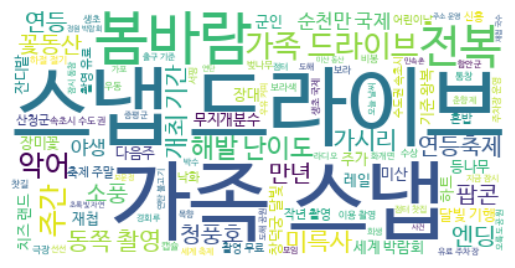

In [556]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[0])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

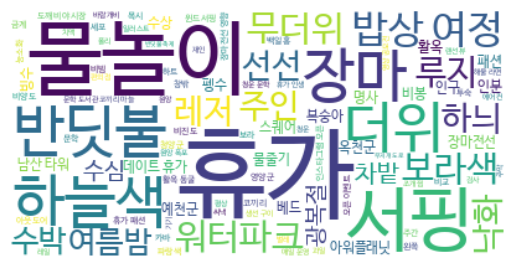

In [557]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[1])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

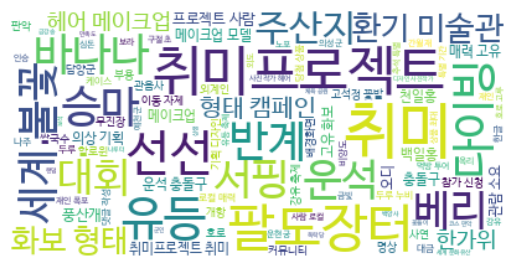

In [558]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[2])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

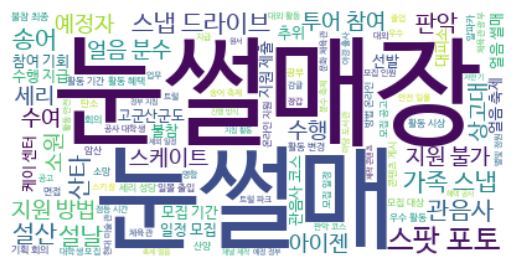

In [559]:
from wordcloud import WordCloud

wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
wordCloud.generate_from_frequencies(season_list[3])
wordCloud.words_
import matplotlib.pyplot as plt
plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## 지역별 키워드 분석

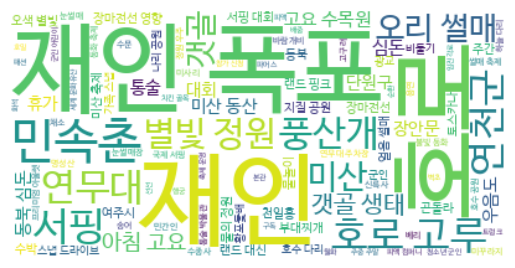

경기


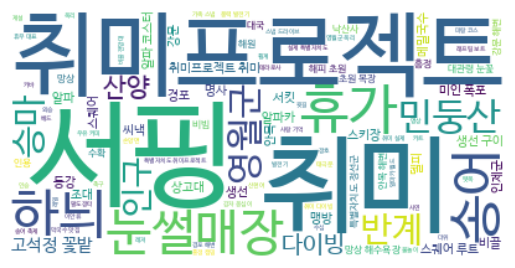

강원


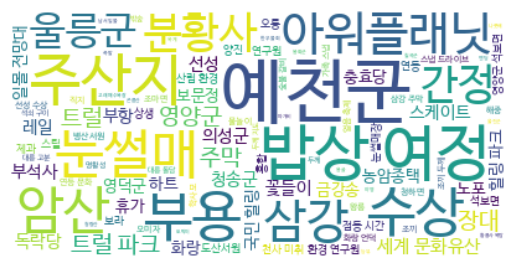

경북


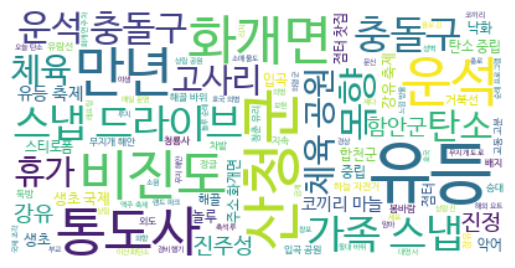

경남


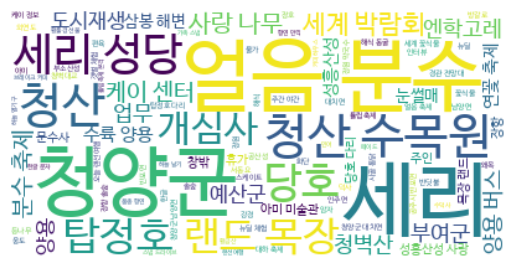

충남


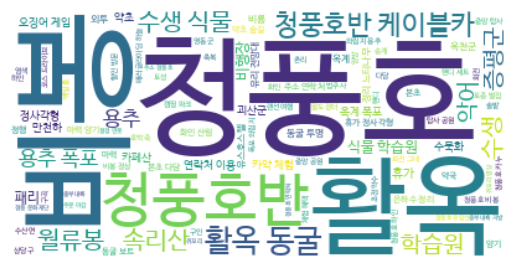

충북


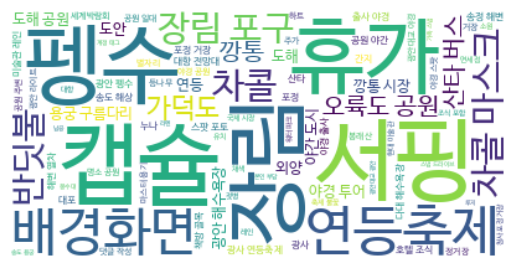

부산


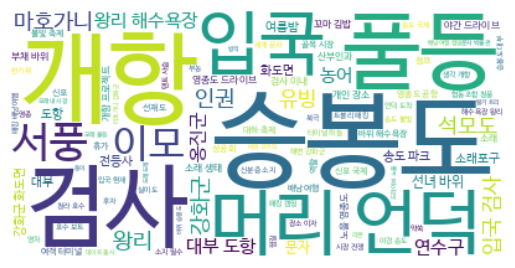

인천


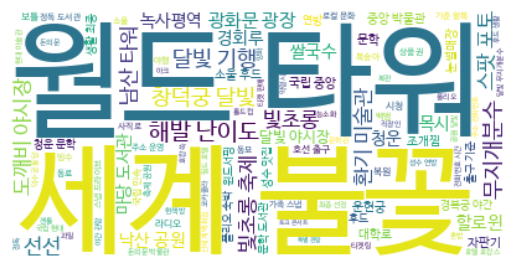

서울


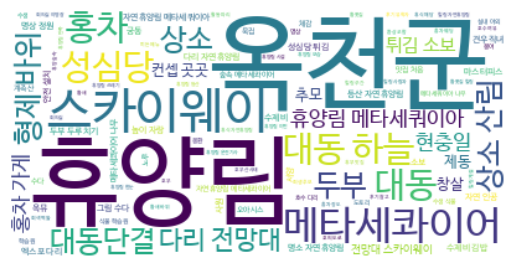

대전


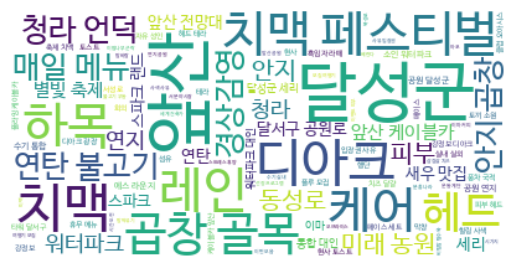

대구


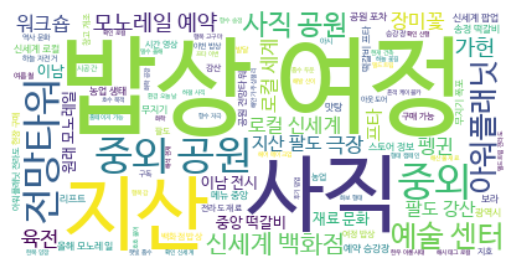

광주


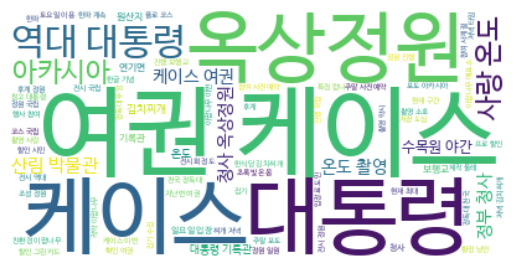

세종


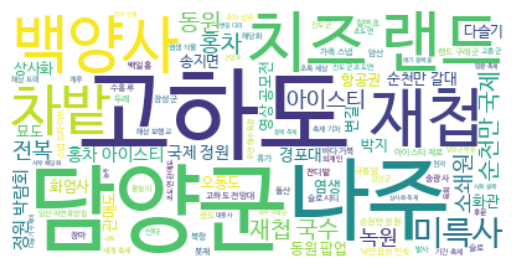

전남


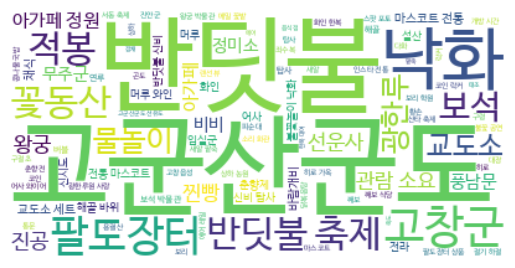

전북


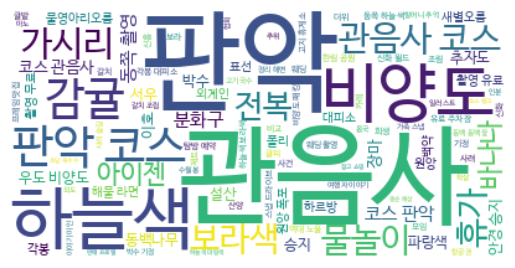

제주


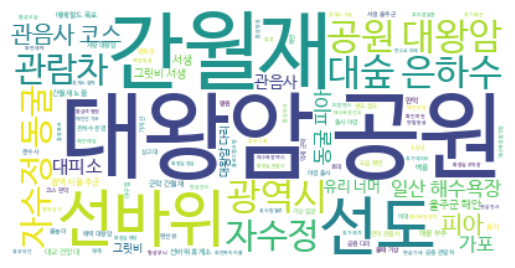

울산


In [590]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordCloud = WordCloud(background_color='white', font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')
for i in range(len(region_list)):
    wordCloud.generate_from_frequencies(region_list[i])
    wordCloud.words_
    plt.imshow(wordCloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    print(region[i])

## 꽃과 관련된 키워드의 월별 빈도수
- 봄, 가을에 빈도 수 증가

In [576]:
 pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')

,flower_check
card_month,
1,40.0
10,134.0
11,106.0
12,47.0
2,52.0
3,188.0
4,187.0
5,74.0
6,61.0


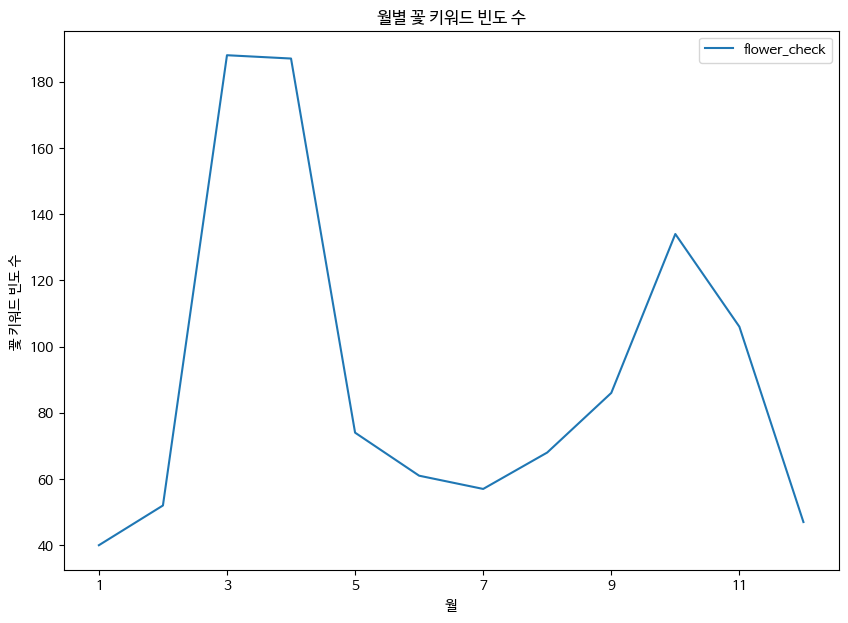

In [577]:
flower_count = pd.pivot_table(df_sns_title, index = "card_month",values="flower_check",aggfunc='sum')
flower_count = flower_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = flower_count.plot(kind='line', figsize=(10, 7))
plt.title('월별 꽃 키워드 빈도 수')
plt.xlabel('월')
plt.ylabel('꽃 키워드 빈도 수 ')

# 그래프 표시
plt.show()

## 축제와 관련된 키워드의 월별 빈도수
- 봄, 가을에 빈도 수 증가

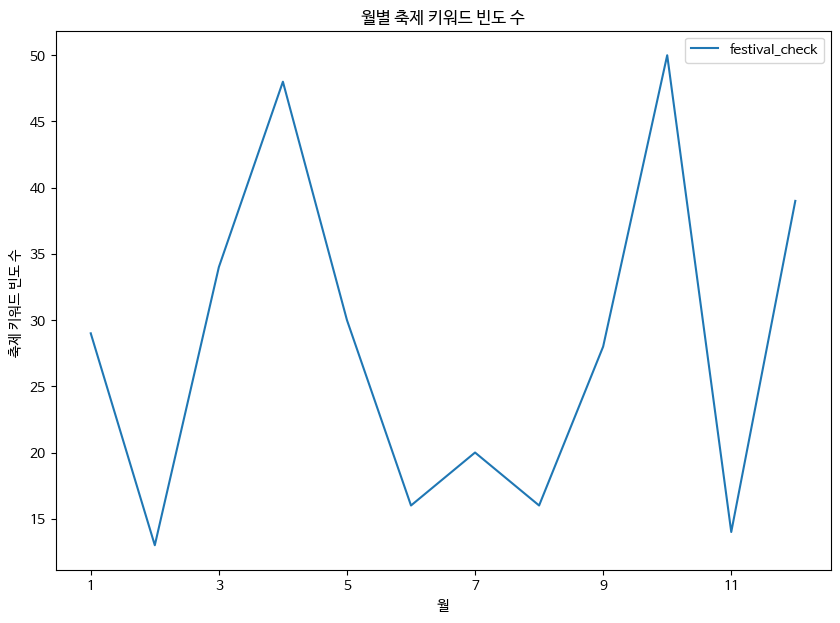

In [580]:
festival_count = pd.pivot_table(df_sns_title, index = "card_month",values="festival_check",aggfunc='sum')
festival_count = festival_count.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# 선 그래프 그리기
# concept 값이 0인 행 제거
# 그래프 제목, x축 레이블, y축 레이블 설정
ax = festival_count.plot(kind='line', figsize=(10, 7))
plt.title('월별 축제 키워드 빈도 수')
plt.xlabel('월')
plt.ylabel('축제 키워드 빈도 수 ')

# 그래프 표시
plt.show()

# 결론
- 봄 : 드라이브와 꽃, 축제와 관련된 키워드가 많음
- 여름 : 물놀이, 루지, 서핑, 워터파크와 같이 레저 스포츠와 관련된 키워드가 많음
- 가을 : 취미 프로젝트, 팔도 장터, 유등, 세계 불꽃과 같이 행사나 꽃과 관련된 키워드가 많음
- 겨울 : 눈썰매, 송어와 같이 레저 스포츠와 관련된 키워드가 많음